# V-I charactersitics of Neuron channel.

In [29]:
%matplotlib inline
from parameters import *
from tau_ch_plot_study import *
import numpy as np

In [30]:
VSHIFT = 5e-3 
tau_multiplier = 1
f = 0
gmbar_Na = 120e-3
gmbar_K = 36e-3
E_Na = .05 # reversal potentail.
E_K = -.08
K_n_params = get_k_n_params(VSHIFT=VSHIFT, tau=tau_multiplier, f=f)
Na_h_params = get_na_h_params(VSHIFT=VSHIFT, tau=tau_multiplier, f=f)
Na_m_params = get_na_m_params(VSHIFT=VSHIFT, tau=tau_multiplier, f=f)
vdivs, vmin, vmax = K_n_params[-3:]

In [31]:
K_n_params

params(A_A=-550.0000000000001, A_B=-10000.0, A_C=-1.0, A_D=0.05500000000000001, A_F=-0.01, B_A=125.0, B_B=0.0, B_C=0.0, B_D=0.065, B_F=0.08, VDIVS=3000, VMIN=-0.1, VMAX=0.04999999999999999)

In [32]:
def get_alpha_beta_params(parameters):
    return (parameters[:5], parameters[5:-3])
get_alpha_beta_params(K_n_params)

((-550.0000000000001, -10000.0, -1.0, 0.05500000000000001, -0.01),
 (125.0, 0.0, 0.0, 0.065, 0.08))

In [33]:
def compute_alpha_beta(v, A, B, C, D, F):
    C = 1 if B == 0 else -1
    return (A+B*v)/(C+ np.exp((D+v)/F))

In [34]:
%%latex
General form
$$\alpha,\beta = \frac{A+BV_m}{C+\exp(\frac{D+V_m}{F})}$$

<IPython.core.display.Latex object>

In [35]:
%%latex
form-1 When B=0
$$\alpha,\beta = \left.\frac{A}{1+\exp(\frac{D+V_m}{F})}\right|_{B=0}$$

<IPython.core.display.Latex object>

In [36]:
%%latex
form-1 When B != 0
$$\alpha,\beta = \left.\frac{A+BV_m}{-1+\exp(\frac{D+V_m}{F})}\right|_{B\not =0}$$

<IPython.core.display.Latex object>

In [37]:
v_values = np.linspace(vmin, vmax, vdivs)

In [38]:
import pandas as pd
data = pd.DataFrame(v_values, columns=['voltage'])

In [39]:
data['k_n_alpha'] = data['voltage'].apply(compute_alpha_beta, 
                                          args=get_alpha_beta_params(K_n_params)[0])
data['k_n_beta'] = data['voltage'].apply(compute_alpha_beta, 
                                         args=get_alpha_beta_params(K_n_params)[1])

In [40]:
data['na_h_alpha'] = data['voltage'].apply(compute_alpha_beta,
                                           args=get_alpha_beta_params(Na_h_params)[0])
data['na_h_beta'] = data['voltage'].apply(compute_alpha_beta, 
                                            args=get_alpha_beta_params(Na_h_params)[1])

In [41]:
data['na_m_alpha'] = data['voltage'].apply(compute_alpha_beta, 
                                           args=get_alpha_beta_params(Na_m_params)[0])
data['na_m_beta'] = data['voltage'].apply(compute_alpha_beta, 
                                         args=get_alpha_beta_params(Na_m_params)[1])

In [42]:
data['k_n_ss'] = data['k_n_alpha']/(data['k_n_alpha']+data['k_n_beta'])
data['na_m_ss'] = data['na_m_alpha']/(data['na_m_alpha']+data['na_m_beta'])
data['na_h_ss'] = data['na_h_alpha']/(data['na_h_alpha']+data['na_h_beta'])
data['m_cube'] = data['na_m_ss']**3
data['h_cube'] = data['na_h_ss']**3
data['n_forth'] = data['k_n_ss']**4
data['g_na'] = data['m_cube']*gmbar_Na*1
data['g_k'] = data['n_forth'][0]*gmbar_K*1
data['na_v'] = data['voltage'] - E_Na
data['k_v'] = data['voltage'] - E_K
data['i_na'] = data['g_na'] * data['na_v']
data['i_k'] = data['g_k'] * data['k_v']
data['i_total'] = data['i_na'] + data['i_k']


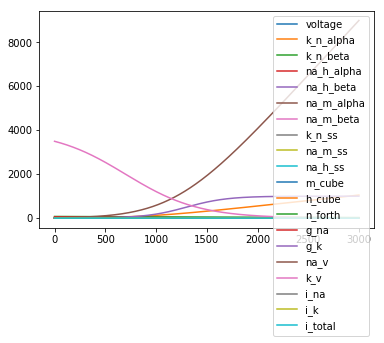

In [43]:
data.plot.line()

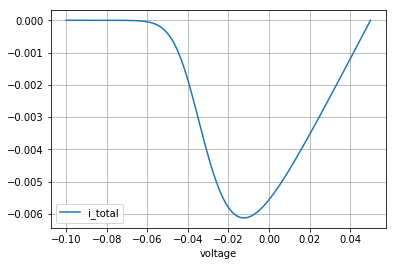

In [44]:
data.plot.line(x='voltage', y='i_total').grid(True)

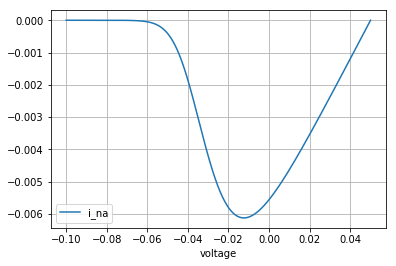

In [45]:
data.plot.line(x='voltage', y='i_na').grid(True)

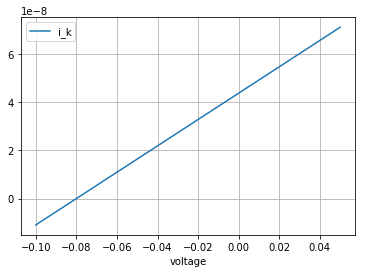

In [46]:
data.plot.line(x='voltage', y='i_k').grid(True)

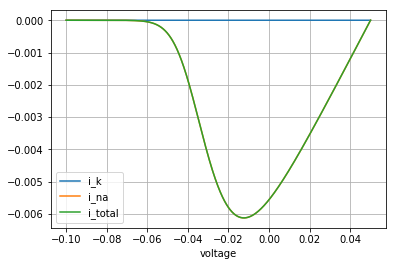

In [47]:
import matplotlib.pyplot as plt # I should Improve this plot!!!
a = data.plot(x='voltage', y='i_k')
data.plot(x='voltage', y='i_na', ax=a)
data.plot(x='voltage', y='i_total', ax=a)
plt.grid(True)